To combat churn, the customer service department of "Kulturist-Data Scientist" has digitized many customer questionnaires. Your task is to conduct an analysis and prepare an action plan to retain customers.
Specifically:

Learn to predict the probability of churn (at the level of the next month) for each customer;
Create typical customer profiles: identify several most prominent groups and characterize their main properties;
Analyze the main features that most strongly influence churn;
Formulate the main conclusions and develop recommendations to improve customer relations:
Identify target customer groups;
Propose measures to reduce churn;
Determine other features of customer interaction.


## Step 1. Load the data

"Kulturist-Data Scientist" has provided information in csv files. The customer has prepared data that contains information from a month before churn and the fact of churn for a specific month. The dataset includes the following fields:

Customer data for the month prior to checking the fact of churn:

'gender' — gender;
'Near_Location' — living or working in the area where the fitness center is located;
'Partner' — employee of a partner company of the club (collaboration with companies whose employees can receive membership discounts - in this case, the fitness center stores information about the customer's employer);
'Promo_friends' — initial enrollment as part of the "bring a friend" promotion (used a friend's promo code when paying for the first membership);
'Phone' — availability of a contact phone number;
'Age' — age;
'Lifetime' — time since the first visit to the fitness center (in months).

Information based on visit logs, purchases, and the current status of the customer's membership:

'Contract_period' — duration of the current active membership (month, 6 months, year);
'Month_to_end_contract' — time until the end of the current active membership (in months);
'Group_visits' — participation in group sessions;
'Avg_class_frequency_total' — average visit frequency per week over the entire membership period;
'Avg_class_frequency_current_month' — average visit frequency per week for the previous month;
'Avg_additional_charges_total' — total revenue from other fitness center services: cafe, sports goods, beauty and massage salon.
'Churn' — the fact of churn in the current month.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'svg' 

gym = pd.read_csv('gym_churn.csv')
display(gym)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0            3                   0.020398                           0.000000   
1            7                   1.922936                           1.910244   
2            2                   1.859098                           1.736502   
3            2                   3.205633                           3.357215   
4            3                   1.113884                           1.120078   
...        ...                        ...                                ...   
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3995      0  
3996      1  
3997      0  
3998      0  
3999      0  

[4000 rows x 14 columns]

## Step 2. Conduct Exploratory Data Analysis (EDA)

### 2.1 Examine the dataset: check if there are any missing values, study the mean values and standard deviations (the describe() method will be useful);

In [2]:
## There are no missing values; each column has 4000 observations.
## We see that all features are numerical.
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
gym['Avg_additional_charges_total'] = gym['Avg_additional_charges_total'].astype('int64')
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int64')
gym['Avg_class_frequency_total'] = gym['Avg_class_frequency_total'].astype('int64')
gym['Avg_class_frequency_current_month'] = gym['Avg_class_frequency_current_month'].astype('int64')

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   gender                             4000 non-null   int64
 1   Near_Location                      4000 non-null   int64
 2   Partner                            4000 non-null   int64
 3   Promo_friends                      4000 non-null   int64
 4   Phone                              4000 non-null   int64
 5   Contract_period                    4000 non-null   int64
 6   Group_visits                       4000 non-null   int64
 7   Age                                4000 non-null   int64
 8   Avg_additional_charges_total       4000 non-null   int64
 9   Month_to_end_contract              4000 non-null   int64
 10  Lifetime                           4000 non-null   int64
 11  Avg_class_frequency_total          4000 non-null   int64
 12  Avg_class_frequency_

In [5]:
## study the mean values and standard deviations. 
gym.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.438000               4.322750     3.724750   
std                       96.370579               4.191297     3.749267   
min                        0.000000               1.000000     0.000000   
25%                       68.000000               1.000000     1.000000   
50%                      136.000000               1.000000     3.000000   
75%                      210.000000               6.000000     5.000000   
max                      552.000000              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.404000                           1.303000   
std                     0.980318                           1.038971   
min                     0.000000                           0.000000   
25%                     1.000000                           0.000000   
50%                     1.000000                           1.000000   
75%                     2.000000                           2.000000   
max                     6.000000                           6.000000   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

#### The describe method shows the main statistical characteristics of the data for each numerical feature (types int64 and float64): the number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

### 2.2 Look at the mean values of the features in the two groups — those who churned and those who stayed (use the groupby() method);

In [6]:
# Look at the mean values of the features in the two groups — those who churned and those who stayed
gym_mean=gym.groupby('Churn').mean()
gym_mean

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    157.941817   
1             1.728558      0.268615  26.989632                    114.572102   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   1.547805   
1                   1.662582  0.990575                   1.005655   

       Avg_class_frequency_current_month  
Churn                                     
0                               1.546444  
1                               0.628652

In [7]:
#  What is the churn rate in our DataFrame?
gym['Churn'].mean()

0.26525

#### Conclusion: 26.5% — a rather poor indicator for the company, with such a churn rate, it could go bankrupt.

###  2.3 Plot bar histograms and feature distributions for those who churned (churn) and those who stayed (did not churn);

In [8]:
gym['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

#### Conclusion: 2939 stayed and 1061 left.

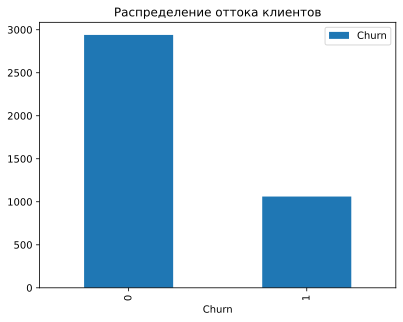

In [9]:
gym['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов');

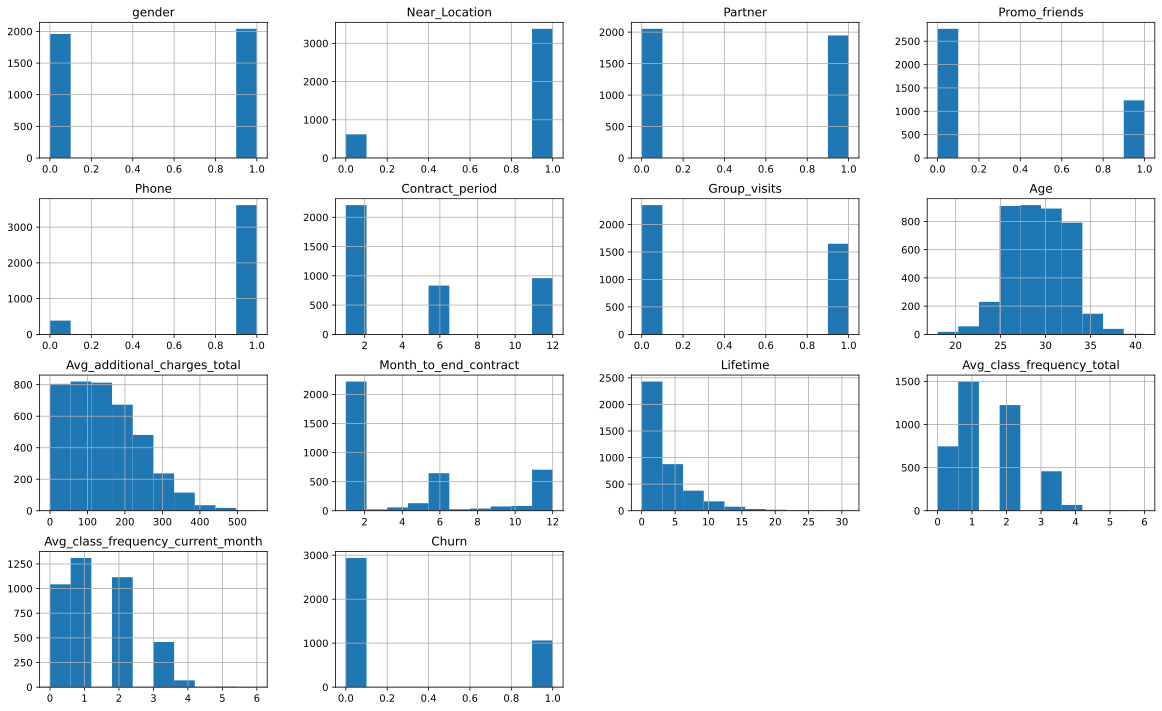

In [10]:
# Теперь посмотрим на распределения всех интересующих нас количественных признаков.
gym.hist(figsize=(20,12));

##### Conclusion: We see that most features are normally distributed. Exceptions are Lifetime, Avg_additional_charges_total, Avg_class_frequency_current_month, Near_Location.

Now, let's visualize the distribution:

'Lifetime' — time since the first visit to the fitness center (in months).
'Near_Location' — living or working in the area where the fitness center is located;
'Avg_class_frequency_total' — average visit frequency per week over the entire membership period;
'Avg_additional_charges_total' — total revenue from other fitness center services: cafe, sports goods, beauty and massage salon.


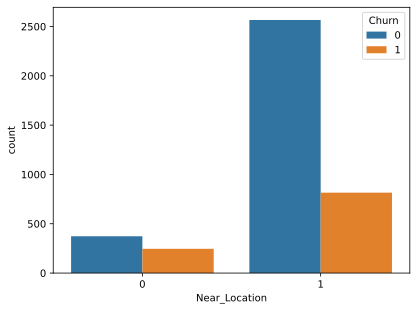

In [11]:
sns.countplot(x='Near_Location', hue='Churn', data=gym);

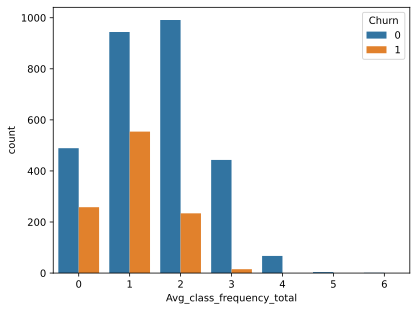

In [12]:
sns.countplot(x='Avg_class_frequency_total', hue='Churn', data=gym);

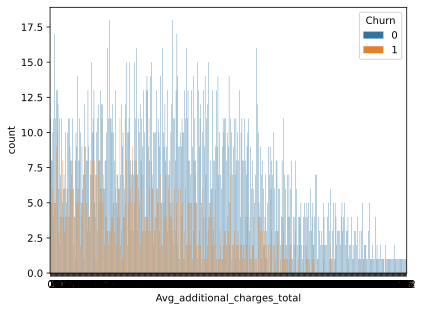

In [13]:
sns.countplot(x='Avg_additional_charges_total', hue='Churn', data=gym);

##### Conclusion:
The churn rate depends on how close the fitness center is to home and work. The farther from home, the higher the churn rate, over 50%.
After the first two visits, churn decreases. So it is important to do everything to ensure the customer comes a second time.
The higher the total revenue from other fitness center services, the lower the churn. Customers should be encouraged to purchase additional sports drinks, cosmetics, and massages.

### 2.4 Plot the correlation matrix and visualize it.

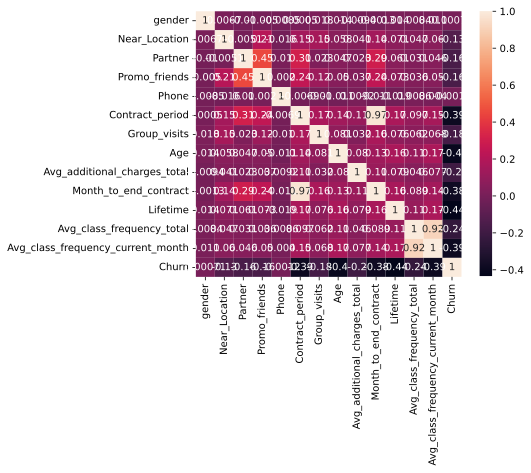

<Figure size 1500x1500 with 0 Axes>

In [14]:
 # Постройте матрицу корреляций и отобразите её
corr_m = gym.corr()
corr_m

# нарисуем heatmap
sns.heatmap(corr_m, square = True, annot=True)

plt.figure(figsize = (15,15))
plt.show()

Let's build the correlation matrix of the numerical features of the dataset and visualize it using the heatmap() method. What can be said about the correlation between the target variable and the other features? Are there any features that correlate with the target variable by more than 0.9 in absolute value? This will allow us to make assumptions about their influence on the target variable even without building a model.

There are no significant outliers or distortions in the diagram. This means that a model can be built on this data.
As for correlations and pair plots, half of the features are quite strongly correlated with the target variable. Most likely, the frequency of gym visits, age, and lifetime have an influence. Even without building a model, and based solely on EDA, we can assume what influences the target variable and how.

#### Conclusion: According to the matrix, there are no features with a high probability of giving the correct answer. However, there are a couple of correlated features:

## Step 3. Build a customer churn prediction model

Build a binary classification model for customers, where the target feature is the fact of customer churn in the next month:

Split the data into training and validation sets using the train_test_split() function.
Train the model on the train set in two ways:
Logistic Regression,
Random Forest.
Evaluate the metrics accuracy, precision, and recall for both models on the validation set. Compare the models based on these metrics. Which model performed better based on the metrics?
Don't forget to specify the random_state parameter when splitting the sample and setting the algorithm.

The actual data that is fed into the model after it is developed is called the test data.

The part of the data that is fed into the model during training is called the training data.

The data on which the model is tested is called the validation data.

### Logistic Regression
Binary classification is a special case of classification where there are only two classes: "0" or "1". The target variable here is a binary value.
A popular algorithm for solving such problems is logistic regression. It is implemented as the LogisticRegression() class in the same linear_model module of the sklearn library as the linear regression algorithm.
Let's predict customer churn, where the target feature is the fact of customer churn in the next month. 
The target variable is 'Churn'.


In [15]:
# LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into features (matrix X) and the target variable (y).
X = gym.drop('Churn', axis = 1) # набор признаков
y = gym['Churn'] # значение целевой переменной

# Split the data into training (X_train, y_train) and validation sets (X_test, y_test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Set the algorithm for our model. 
model = LogisticRegression(solver='liblinear') # задайте модель

# Train the model on the training set.
y_pred=model.fit(X_train, y_train) 

# Use the already trained model to make predictions.
predictions = model.predict(X_test)

# Estimate the probability of belonging to the second class (among classes "0" and "1", we mean class "1") 
# for objects from the validation data set.Make a binary prediction.
probabilities = model.predict_proba(X_test)[:,1]

# Display the values of predictions and probabilities on the screen.
### print(predictions)
### print(probabilities)

Learning to evaluate the quality of this model:

1. Accuracy - accuracy_score(acc = accuracy_score(y_true, y_pred))
This is the proportion of correctly predicted answers out of all predictions. The closer the accuracy value is to 100%, the better.

2. Precision - indicates what proportion of predictions for the "1" class is correct. (precision = precision_score(y_true, y_pred))
This means looking at the proportion of correct answers only among the target class..  

3. Recall - shows how many real "1" class objects you were able to detect with the model. (recall = recall_score(y_true, y_pred))

Each metric ranges from 0 to 1. The closer to one, the better..

In [16]:
# METRICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.81
Recall: 0.81


Conclusion on the metrics: We correctly predict more than 90% of the time. Looking at precision and recall, it seems there is room for improvement. Therefore, to assess the quality of the classifier, we use the ROC AUC metric, or the area under the error curve — AUC-ROC (roc_auc = roc_auc_score(y_true, probabilities[:,1])).
This function takes as input the vector of actual answers y_true and the vector of probabilities of classifying the object as "1". To do this, from the vector of pairs of probabilities of classifying the object as "0" and "1", we take only the second numbers (probabilities[:,1]). The output of this function is a single number ranging from 0 (usually from 0.5) to 1.

In [17]:
from sklearn.metrics import roc_auc_score

# выведем roc_auc_score
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

ROC_AUC: 0.96


Conclusion on ROC AUC: This metric is quite impressive - 0.97! Our model has excellently predicted customer churn.

In fact, many algorithms produce not exactly the probability of belonging to a class at the output of the predict_proba() method, but rather the degree of confidence of the model in belonging to it. If the model is more than 0.5 confident that the object belongs to class "1", then the answer is "1", otherwise — "0".

Automatically, when the confidence is cut off at a threshold of 0.5, predict_proba() produced a result where target class "1" objects were classified as "0". If we lower the threshold (for example, to 0.4) and manually determine the class based on such a "custom" threshold, we will get more acceptable results. Let's do this.

In [18]:
# set the threshold
threshold = 0.4

# based on the probabilities and class ratios, calculate predict
custom_predictions = [0 if i < threshold else 1 for i in probabilities]

# display all studied metrics for the prediction with the new threshold
print('Metrics for the prediction with the custom threshold')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))

print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))

print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))

Metrics for the prediction with the custom threshold
Accuracy for custom: 0.90
Precision for custom: 0.77
Recall for custom: 0.84


Conclusion after lowering the threshold: The priority metric, Recall, has slightly increased. The other metrics were slightly affected by a small decrease. Understanding the threshold is important here.

### 2. RANDOM FOREST

Implementation of Tree Ensembles

Random forest in sklearn is implemented in the ensemble module. From this module, the RandomForestClassifier() and RandomForestRegressor() algorithms are most commonly used for classification and regression tasks, respectively.

from sklearn.ensemble import RandomForestRegressor

ALGORITHM:

rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)  

In [19]:
# зададим алгоритм для новой модели на основе алгоритма решающего дерева

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier # для случайного леса

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score 


# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
 
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

# разделите данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('Churn', axis = 1) # набор признаков
y = gym['Churn'] # значение целевой переменной

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.81
	ROC_AUC: 0.95


Conclusion: Here is the power of ensemble models. The ROC AUC metric of 0.97 is quite high—it contains the maximum amount of information regarding the quality of the model for random forest and gradient boosting algorithms compared to simpler models.

## Step 4. Perform customer clustering

1. Set aside the churn column and perform clustering of the objects (customers):
- Standardize the data.
- Build a distance matrix using the linkage() function on the standardized feature matrix and draw a dendrogram. Note: drawing the dendrogram may take some time! Based on the resulting graph, suggest how many clusters can be identified.

In [20]:
gym

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                            14                      5   
1                1   31                           113                     12   
2                0   28                           129                      1   
3                1   33                            62                     12   
4                0   26                           198                      1   
...            ...  ...                           ...                    ...   
3995             0   33                             2                     12   
3996             1   29                            68                      1   
3997             0   28                            78                     11   
3998             0   32                            61                      5   
3999             1   30                           178                     12   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0            3                          0                                  0   
1            7                          1                                  1   
2            2                          1                                  1   
3            2                          3                                  3   
4            3                          1                                  1   
...        ...                        ...                                ...   
3995         8                          2                                  2   
3996         1                          1                                  0   
3997         2                          2                                  2   
3998         3                          1                                  1   
3999         1                          1                                  1   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3995      0  
3996      1  
3997      0  
3998      0  
3999      0  

[4000 rows x 14 columns]

In [21]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   gender                             4000 non-null   int64
 1   Near_Location                      4000 non-null   int64
 2   Partner                            4000 non-null   int64
 3   Promo_friends                      4000 non-null   int64
 4   Phone                              4000 non-null   int64
 5   Contract_period                    4000 non-null   int64
 6   Group_visits                       4000 non-null   int64
 7   Age                                4000 non-null   int64
 8   Avg_additional_charges_total       4000 non-null   int64
 9   Month_to_end_contract              4000 non-null   int64
 10  Lifetime                           4000 non-null   int64
 11  Avg_class_frequency_total          4000 non-null   int64
 12  Avg_class_frequency_

In [22]:
## Let's draw a dendrogram in Python. 
# First, from the module for hierarchical clustering, hierarchy, import the linkage() and dendrogram() classes:

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage # Нарисуем дендограмму в Python

## Standardization of data is mandatory before working with algorithms.
sc = StandardScaler()# создаём объект класса scaler (нормализатор)
X_sc = sc.fit_transform(gym)

linked = linkage(X_sc, method = 'ward') 

## The variable linked contains the "linkage" table between objects. It can be visualized as a dendrogram:

plt.figure(figsize=(10, 5))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show() 

CONCLUSION: The suggested optimal number of clusters is 5 — five different colors on the graph.
The complexity of agglomerative clustering lies not in the design of the algorithm itself, but in the calculations the machine performs to build the dendrogram. Calculating pairwise distances can take a lot of time. Therefore, when solving a clustering problem, it is useful to build a dendrogram on a random subsample, and after estimating the optimal number of clusters, run the faster K-Means algorithm.

Train a clustering model based on the K-Means algorithm and predict customer clusters.
We will agree to use n=5 clusters so that your results can be compared with those of other students. However, in real life, no one will give you the correct answer, and the decision is up to you (based on the analysis of the graph from the previous step).

Look at the mean values of features for the clusters. Can you notice anything right away?

Plot the distributions of features for the clusters. Can you notice anything from them?
For each cluster, calculate the churn rate (using the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to churn and which are reliable?

The algorithm called KMeans is implemented in the sklearn.cluster module. Here is its syntax:

from sklearn.cluster import KMeans

Mandatory standardization of data before working with algorithms

sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=5, random_state=0) # Set the number of clusters to 5 and fix the random_state value for result reproducibility.

labels = km.fit_predict(X_sc) # Apply the algorithm to the data and form the cluster vector.


In [23]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Define a function to plot pairwise feature graphs for clusters.
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.boxplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
        
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# В переменной labels сохраняются индексы предложенных алгоритмом групп:
labels = km.fit_predict(x_sc)

# Save the cluster labels in a field of our dataset.
gym['cluster_km'] = labels

# Get the mean values of the features for the obtained clusters using the groupby() method.
clusters = gym.groupby(['cluster_km']).mean()

display(clusters) 


# Let's plot the graphs for pairwise combinations of features with cluster labeling.
col_pairs = list(itertools.combinations(gym.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(gym, pair[0], pair[1], 'cluster_km')
    print(pair)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.507181       0.956912  0.785458       0.569120  1.000000   
1           0.527415       0.869452  0.472585       0.308094  0.000000   
2           0.505852       1.000000  0.331599       0.224967  1.000000   
3           0.496154       0.000000  0.461538       0.076923  0.994231   
4           0.516474       0.999176  0.326194       0.221582  1.000000   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                 10.551167      0.538600  29.886894   
1                  4.806789      0.430809  29.336815   
2                  1.618986      0.283485  26.901170   
3                  2.284615      0.215385  28.540385   
4                  2.221582      0.456343  30.213344   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             159.186715               9.603232  4.601436   
1                             144.281984               4.493473  3.971279   
2                             114.697009               1.566970  1.078023   
3                             135.282692               2.153846  2.826923   
4                             160.303954               2.098023  4.903624   

            Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.519749                           1.503591   
1                            1.389034                           1.300261   
2                            0.958388                           0.596879   
3                            1.244231                           1.098077   
4                            1.653213                           1.654860   

               Churn  
cluster_km            
0           0.013465  
1           0.261097  
2           0.931079  
3           0.436538  
4           0.002471

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 500x500 with 0 Axes>

Cluster 0: Only gender 0
Cluster 4: Only those who live nearby
Clusters 0, 1, 2: Those who live nearby and brought friends

In [ ]:
# BINARY FEATURES graphs

sns.countplot(x='Near_Location', hue='cluster_km', data=gym) 

In [ ]:
sns.countplot(x='Churn', hue='cluster_km', data=gym) 

#### CONCLUSION for binary features:
3rd cluster - only those who live far away.
4th cluster - only those who have churned.

##### CONCLUSION:
The churn rate depends on how close the fitness center is to home and work. The farther from home, the higher the churn rate, exceeding 50%.
After the first two visits, churn decreases. Therefore, everything should be done to ensure the client comes a second time.
The higher the total revenue from other fitness center services, the lower the churn rate. Clients should be engaged with additional sports drinks, cosmetics, and massages.

## Step 5. Formulate conclusions and make basic recommendations for working with customers

Formulate the main conclusions and suggest recommendations for the strategy of interacting with and retaining customers.
You don't need to describe the strategy in detail: 3-4 important principles and examples of their implementation in the form of specific marketing actions are sufficient.


Pay attention to customers under 36 years old. Create, for example, a special plan for young people to attract them with a more advantageous price. Advertise by putting up posters near educational institutions or placing banners near schools and universities. Emphasize that beauty equals health, for instance.

Create a favorable plan for everyone for the first 10 months of visits. For example, a plan called "BEGINNER."

Increase the number of gym visits in the contract. Make one additional visit per week free.

Apply these favorable plans to the age category under 36 years old.